In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.externals import joblib
import random as rand
import numpy as np
from tsr_helpers import print_executed
from tsr_helpers import plot_learning_curve
import datetime
import warnings

print_executed()



 EXECUTED BLOCK AT 0:15:52


In [4]:
# load positive features
# for binary classification load only one features array or merge to one array
positive_features_a = np.load('dataset/extracted_features/positive_features_a.npy')
positive_features_b = np.load('dataset/extracted_features/positive_features_b.npy')
positive_features_c = np.load('dataset/extracted_features/positive_features_c.npy')
positive_features_d = np.load('dataset/extracted_features/positive_features_d.npy')

# load negative features
negative_features = np.load('dataset/extracted_features/negative_features_improved.npy')
# negative_features_road = np.load('dataset/extracted_features/negative_features_road.npy')
# negative_features_kitti = np.load('dataset/extracted_features/negative_features_KITTI_extracted.npy')

# concatenate negative features
# negative_features = np.concatenate((negative_features, negative_features_kitti, negative_features_road),
#                                    axis=0)
# uncomment if binary classification
positive_features = np.concatenate((positive_features_a, positive_features_b, positive_features_c, 
                                    positive_features_d), axis=0)

# stratify dataset
# uncomment if binary classification
np.random.shuffle(positive_features)
'''
np.random.shuffle(positive_features_a)
np.random.shuffle(positive_features_b)
np.random.shuffle(positive_features_c)
np.random.shuffle(positive_features_d)
'''
np.random.shuffle(negative_features)

number_of_samples = 10000

# uncomment if binary classification
positive_features = positive_features[:number_of_samples]
'''
positive_features_a = positive_features_a[:number_of_samples]
positive_features_b = positive_features_b[:number_of_samples]
positive_features_c = positive_features_c[:number_of_samples]
positive_features_d = positive_features_d[:number_of_samples]
'''
negative_features = negative_features[:number_of_samples]

'''
total_signs_a = positive_features_a.shape[0]
total_signs_b = positive_features_b.shape[0]
total_signs_c = positive_features_c.shape[0]
total_signs_d = positive_features_d.shape[0]
'''
total_signs = positive_features.shape[0]
total_nonsigns = negative_features.shape[0]

print_executed()


 EXECUTED BLOCK AT 0:15:56


In [5]:
print("Scaling features...")
print("\nSigns type a: ", len(positive_features_a), len(positive_features_a[0]))
print("Signs type b: ", len(positive_features_b), len(positive_features_b[0]))
print("Signs type c: ", len(positive_features_c), len(positive_features_c[0]))
print("Signs type d: ", len(positive_features_d), len(positive_features_d[0]))
print("Signs type d: ", len(positive_features_d), len(positive_features_d[0]))

print("\nNonsigns GTSDB: ", len(negative_features), len(negative_features[0]))
# print("Nonsigns road: ", len(negative_features_road), len(negative_features_road[0]))
# print("Nonsigns KITTI: ", len(negative_features_kitti), len(negative_features_kitti[0]))

print("\nNonsigns at all: ", len(negative_features), len(negative_features[0]))
print("Signs at all: ", len(positive_features), len(positive_features))

# uncomment if binary classification
unscaled_x = np.vstack((positive_features, negative_features)).astype(np.float64)
'''
unscaled_x = np.vstack((positive_features_a, 
                        positive_features_b,
                        positive_features_c,
                        positive_features_d,
                        negative_features)).astype(np.float64)
'''
scaler = StandardScaler().fit(unscaled_x)
x = scaler.transform(unscaled_x)

# uncomment if binary classification
y = np.hstack((np.ones(total_signs), np.zeros(total_nonsigns)))
'''
y = np.hstack((np.ones(total_signs_a),
               np.full(total_signs_b, 2),
               np.full(total_signs_c, 3),
               np.full(total_signs_d, 4),
               np.zeros(total_nonsigns)))
'''
print(" x shape: ", x.shape, " y shape: ", y.shape)

print_executed()


Scaling features...

Signs type a:  11130 750
Signs type b:  20340 750
Signs type c:  5639 750
Signs type d:  2100 750
Signs type d:  2100 750

Nonsigns GTSDB:  10000 750

Nonsigns at all:  10000 750
Signs at all:  10000 10000
 x shape:  (20000, 750)  y shape:  (20000,)

 EXECUTED BLOCK AT 0:16:19


Plot learning curve for dataset

 EXECUTED BLOCK AT 18:5:6


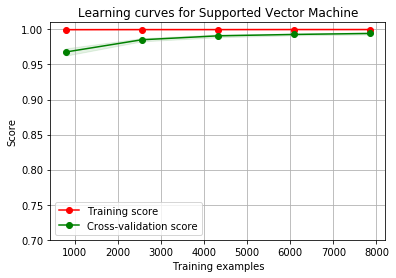

In [15]:
print("Plot learning curve for dataset")

svc = SVC(probability=True)
title = "Learning curves for Supported Vector Machine"
warnings.filterwarnings("ignore")
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(svc, title, x, y, cv=cv, ylim=(0.7, 1.01))

print_executed()


In [6]:
print("Training classifier and saving models...")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rand.randint(1, 100))

svc = SVC(probability=True)
warnings.filterwarnings("ignore")
svc.fit(x_train, y_train)
accuracy = svc.score(x_test, y_test)
y_pred_proba = svc.predict_proba(x_test)
y_pred = np.argmax(y_pred_proba, axis=1)
print(classification_report(y_test, y_pred))
print("overall accuracy:", np.round(accuracy, 4))
print(confusion_matrix(y_test, y_pred))


# save models
now = datetime.datetime.now()
created = str(now.year)+str(now.month)+str(now.day)  # +str(now.hour)+str(now.minute)
joblib.dump(svc, './trained_models/SVC_'+created+'.pkl')
joblib.dump(scaler, './trained_models/scaler_'+created+'.pkl')


print_executed()



Training classifier and saving models...
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1976
         1.0       0.99      0.99      0.99      2024

   micro avg       0.99      0.99      0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000

overall accuracy: 0.9912
[[1964   12]
 [  22 2002]]

 EXECUTED BLOCK AT 0:20:33
